# Class 7: k-Means Clustering

*This notebook is partially adapted from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).

I today's class we will explore the k-Means clustering algorithm, which is an unspervised ML approach to classifying objects.

In [36]:
#Let's begin with the basic imports we will need for today
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_blobs

# 1. $\underline{{\rm kMeans\ Clustering\ with\ toy\ data}}$

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.

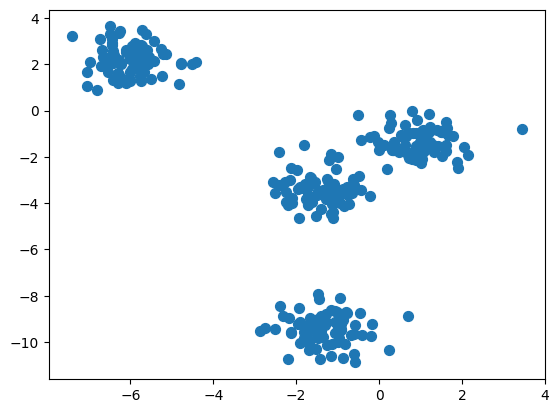

In [71]:
#Let's make the toy data with make_blobs
### This cell only makes and plots the data
pos_basic, labels_basic = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=2)

plt.scatter(pos_basic[:, 0], pos_basic[:, 1], s=50);
plt.savefig('blobs.pdf', dpi=180, bbox_inches='tight')

What are our training features?? This is an UNSUPERVISED ML algorithm so we will only fit our model with the entire array of features directly.

In [38]:
features_basic = pos_basic

We can pick out the clusters easily, now lets' see how the algotithm does.

### 1.1 a. define the model

In [39]:
### We have to start by providing it a number of centroids to use!
### n_cluster is the number of centroids
model_basic = KMeans(n_clusters=4)

### 1.1.b. fit the model AND make predictions in ONE GO!

In [40]:
### NOTICE that this is an UNSUPERVISED ML algotrith
### so we only fit with the entire array of features
### There is NO train/test split here
### and it directly makes the predictions
### we will save the predictions in a array as usual
y_basic = model_basic.fit_predict(features_basic)

In [41]:
### let's print out the labels for each data point
y_basic

array([2, 2, 0, 2, 3, 1, 2, 1, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 3, 2, 1, 1,
       0, 3, 2, 3, 0, 3, 1, 3, 0, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 3, 2,
       0, 1, 1, 1, 1, 3, 0, 3, 1, 0, 3, 1, 0, 1, 1, 2, 2, 0, 0, 3, 0, 1,
       2, 2, 3, 3, 1, 3, 1, 1, 2, 2, 2, 3, 0, 0, 1, 1, 3, 1, 0, 3, 3, 0,
       0, 1, 3, 1, 2, 1, 2, 2, 3, 2, 3, 3, 2, 0, 2, 1, 3, 0, 2, 1, 2, 2,
       3, 1, 1, 1, 2, 3, 3, 1, 0, 1, 3, 0, 3, 1, 2, 0, 3, 0, 0, 1, 0, 2,
       0, 3, 2, 0, 0, 2, 3, 2, 2, 3, 2, 1, 3, 0, 2, 3, 0, 0, 0, 1, 0, 3,
       3, 0, 3, 3, 1, 1, 1, 0, 0, 2, 0, 3, 1, 1, 2, 2, 0, 1, 0, 2, 2, 3,
       0, 0, 1, 2, 2, 0, 0, 3, 2, 0, 3, 1, 0, 3, 2, 1, 2, 3, 0, 3, 0, 3,
       2, 2, 0, 0, 3, 2, 3, 2, 2, 1, 0, 3, 0, 1, 2, 2, 3, 3, 1, 3, 3, 0,
       3, 3, 1, 3, 1, 1, 0, 2, 3, 0, 1, 1, 3, 3, 0, 2, 1, 0, 3, 2, 3, 2,
       0, 3, 1, 3, 2, 1, 3, 1, 3, 1, 0, 1, 3, 3, 3, 1, 1, 2, 1, 0, 0, 1,
       1, 2, 1, 0, 1, 2, 0, 3, 2, 0, 1, 0, 2, 3, 2, 0, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 1, 3, 2, 0, 1, 1, 3, 0, 3, 0, 2], d

In [72]:
np.save('y_predictions_blobs.npy', y_basic)

In [73]:
y_basic = np.load('y_predictions_blobs.npy')

In [42]:
### ok and we can get the unique labels
np.unique(y_basic, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([75, 75, 75, 75]))

What are the classes and how many data points are in each?

After we fit the model, it will also now return the positions of the centroids

In [43]:
### Here are the center positions of the clusters
### the first column are the x-positions and the second column the y-positions
centroids = model_basic.cluster_centers_
centroids

array([[-1.42957701, -3.41077915],
       [-1.32795853, -9.46030787],
       [-5.9922815 ,  2.22118173],
       [ 0.92917705, -1.30454635]])

### 1.1.d. Visually inspect the results

Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

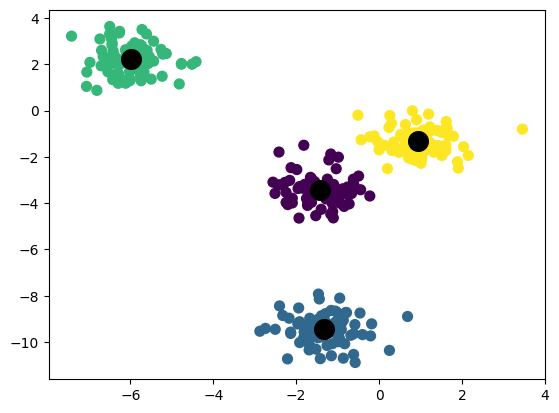

In [44]:
### we will plot the positions of the points and color code each one by its label predicted
### by the KMeans clustering model we just made, model_basic
plt.scatter(pos_basic[:, 0], pos_basic[:, 1], c=y_basic, s=50, cmap='viridis')

### Let's also plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200);

### 1.1.d Evaluate with a score

In [45]:
### we use the silhouette_score as we saw in the lecture:
silhouette_score(features_basic, y_basic)

np.float64(0.7495258813073379)

Not bad! A "perfect" score is = 1, and a "horrible" score is =-1

This says we can confidently say that the datapoints belong in the assigned clusters

# $\underline{{\rm Exercise\ A.}}$

#### For the follwing questions, refer to the documentation for the k-means algorithm:

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

1\. What is the meaning of the parameter "init" and what do you think would be the best choice for this parameter?

2\. What is the meaning of the parameter n\_init? Would it be ok to set it to 1 or 2, rather than its default value, 10? Why?

3\. In lecture we talked about the cost function, which needs to be minimized to find the optimal centroids. Can you identify the cost function in the language of scikit-learn?

### 1.2 Hyperparameter tuning

The following cell is for us to visualize the evolution of centroid positions as a function of number of max iterations "max_iter" for each different oprion for "init".

You may change the number of max iterations, (between 1-10) n_iter= at the top of the cell and then rerun the cell to see how it changes.

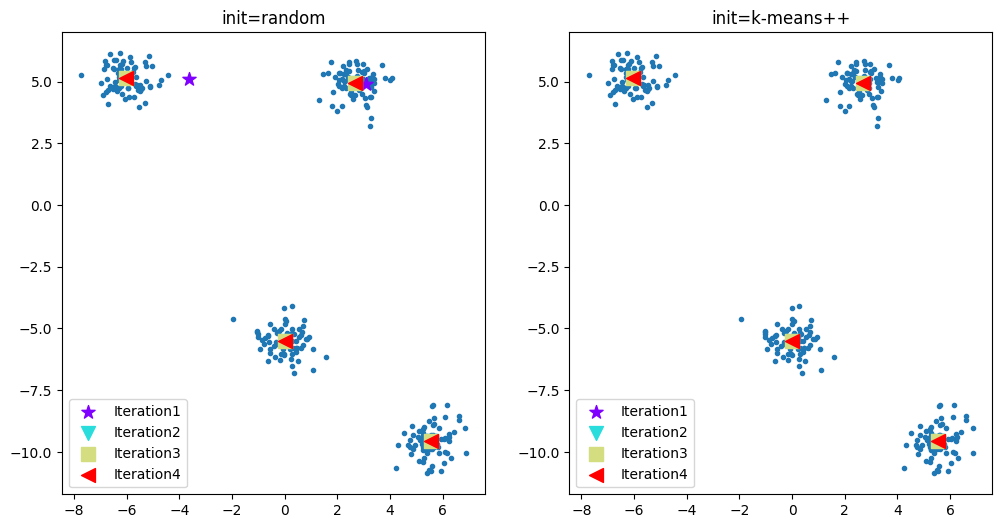

In [46]:
### ONLY CHANGE THIS VARIABLE TO EXPLOR MAX NUMBER OF ITERATIONS
n_iter = 5


### DON.T CHANGE THE REST OZF THIS CODE

#make new blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=10)

marks = ['^', '*','v', 's', '<', '>', 'd', ',', 'x', '+']
fig = plt.figure(figsize=(12,6))

for i in range(2):
    plt.subplot(1,2, 1+i)
    plt.scatter(X[:, 0], X[:, 1], marker='.') # plot the points
    #The line below picks a bunch of colors
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.rainbow(np.linspace(0, 3, 10))))
    for j in range(1,n_iter):
        init_list = ['random', 'k-means++' ]
        plt.title('init='+init_list[i])
        kmeans = KMeans(n_clusters=4, max_iter=j, init=init_list[i], n_init='auto')
        y_kmeans = kmeans.fit_predict(X)
        centers = kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], marker=marks[j], s=100,\
                    label = 'Iteration'+str(j));
    plt.legend();

Based on the output of the above plots, what would you choose for init?

## 1.3 What happens if we start with the wrong k (number of clusters)...

Let's make a model to run on our basic blobs but this time start with n_clusters = 2

In [47]:
### Dedine the model
model_2 = KMeans(n_clusters=2)

### fit and predict in one go
y_pred_2 = model_2.fit_predict(features_basic);

In [48]:
### get the unique labels
np.unique(y_pred_2)

array([0, 1], dtype=int32)

In [49]:
### get the centroids of the clusters
centroids_2 = model_2.cluster_centers_
centroids_2

array([[-1.32795853, -9.46030787],
       [-2.16422715, -0.83138126]])

In [50]:
### evaluate using silhouette_score
silhouette_score(features_basic, y_pred_2)

np.float64(0.579808928228044)

Ok, same blobs, lower score, let's plot the blobs and color code by predictions again

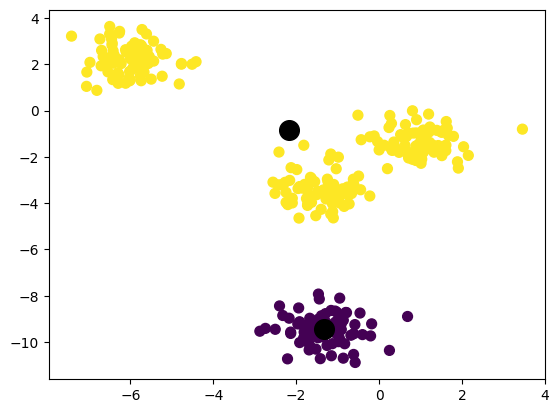

In [51]:
plt.scatter(pos_basic[:, 0], pos_basic[:, 1], c=y_pred_2, s=50, cmap='viridis')

plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='black', s=200);

#### Re-run the above section changing n_clusters in model_2 and seeing how the clusters change

## 3. The elbow curve

So what happens if we don't know how many clusters is the correct number to use in our model? We can plot an elbow curve to get an intuition. This can also be used as an evaluation method to see if the curve agrees with our choice on n_clusters.

Remember, kMeans clustering works to lower the "inertia" score. (The sum of square distances of the points from thier centers)

In [52]:
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(pos_basic)
    inertias.append(kmeans.inertia_)

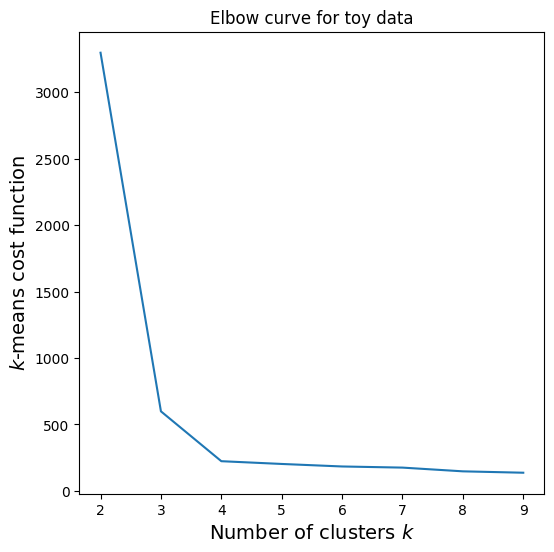

In [53]:
fig = plt.figure(figsize=(6, 6))
plt.plot(range(2, 10), inertias)
plt.title('Elbow curve for toy data');
plt.xlabel('Number of clusters $k$', fontsize = 14);
plt.ylabel('$k$-means cost function', fontsize = 14);

At which value is the most extreme change in our elbow curve? This correlates with the number of clusters we should define in our model.

# $\underline{{\rm Exercise\ B.}}$

In the cell below is another set of blobs that is more complicated than our pos_basic blobs from the first section.

Their poritions are named "pos_2" and their true colors are called "colors_2", but don't look at them until after you get your model predictions! In a real-world scenario you won't always know how many clusters you have!

#### Run k-Means clustering on these blobs.
1. Decide if you want to create an elbow plot before or after you train the model!
2. Define a model
3. Fit and predict the model in one go
4. get the positions of the centroids from your fit model
5. Visually inspect the results by plotting the data points (pos_2) and color coding them by the true colors (colors_2) and plotting the centroids on top
5. Evalute with the silhouette score
6. adjust if needed

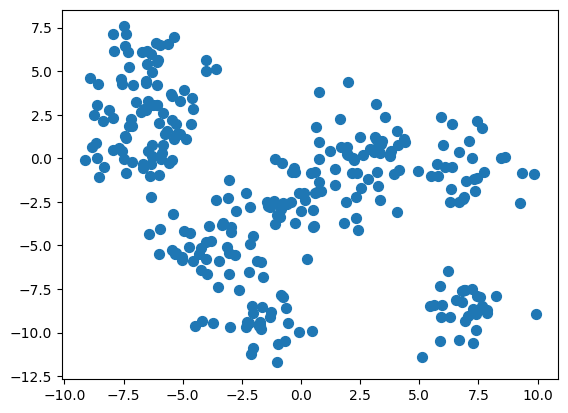

In [54]:
pos_2, colors_2 = make_blobs(n_samples=300, centers=10,
                       cluster_std=1.20, random_state=2)

plt.scatter(pos_2[:, 0], pos_2[:, 1], s=50);

In [55]:
#I'll start with the elbow plot
inertias_2 = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(pos_2)
    inertias_2.append(kmeans.inertia_)

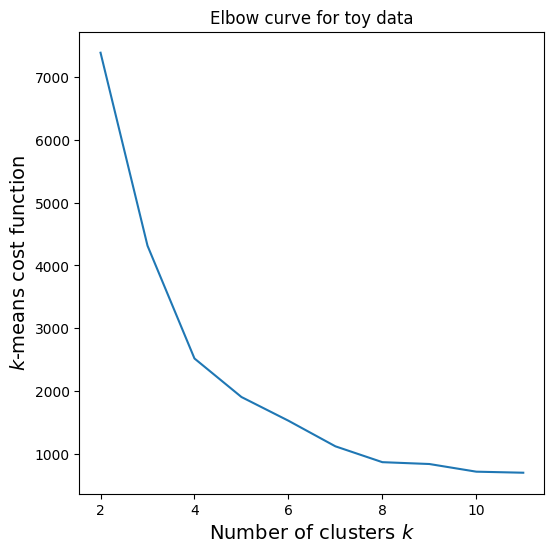

In [56]:
fig = plt.figure(figsize=(6, 6))
plt.plot(range(2, 12), inertias_2)
plt.title('Elbow curve for toy data');
plt.xlabel('Number of clusters $k$', fontsize = 14);
plt.ylabel('$k$-means cost function', fontsize = 14);

In [57]:
#ok, I will use 8 clusters in the model
model_3 = KMeans(n_clusters=8)

In [58]:
#now I fit and predict in one go, and store the outputs to a variable
y_pred_3 = model_3.fit_predict(pos_2)

In [59]:
#lets see whats in the oredicted labels
np.unique(y_pred_3, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([26, 29, 58, 63, 30, 30, 29, 35]))

In [60]:
# let's get the centroids
centroids_3 = model_3.cluster_centers_

In [61]:
# get the silhouette score
silhouette_score(pos_2, y_pred_3)

np.float64(0.4616819911081247)

Ok, it isn't great, but there seem to be several overlapping "clusters". So this makes sense.

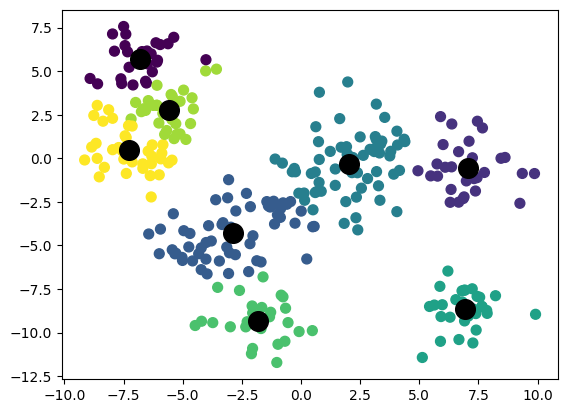

In [62]:
# Let's plot
#
plt.scatter(pos_2[:, 0], pos_2[:, 1], c=y_pred_3, s=50, cmap='viridis')

plt.scatter(centroids_3[:, 0], centroids_3[:, 1], c='black', s=200);

seems resonable

# 3. $\underline{{\rm Examples\ from\ other\ tutorials}}$

## 3.1 k-Means doesn't do well on non-convex shapes

In [63]:
from sklearn.datasets import make_moons

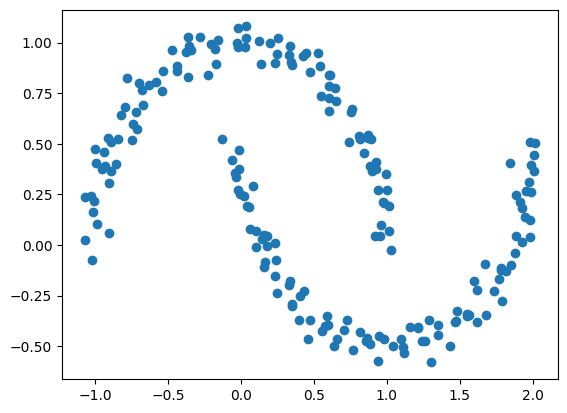

In [64]:

X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

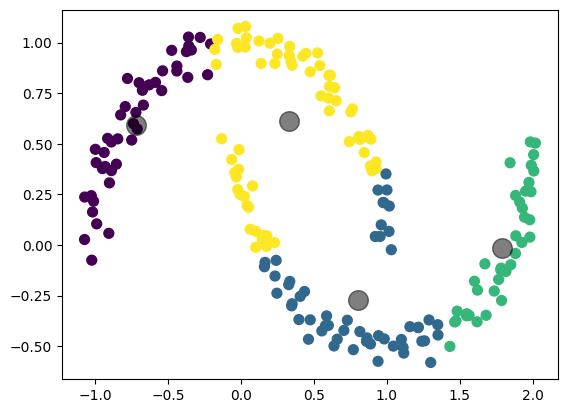

In [65]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## 3.2 k-Means does pretty well on images!

### Example: k-means on digits

We will start by loading the digits and then finding the ``KMeans`` clusters.
Recall that the digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

In [66]:
from sklearn.datasets import load_digits

In [67]:
digits = load_digits()
digits.data.shape

(1797, 64)

The clustering can be performed as we did before:

In [68]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [69]:
np.unique(clusters)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.
Let's see what these cluster centers look like:

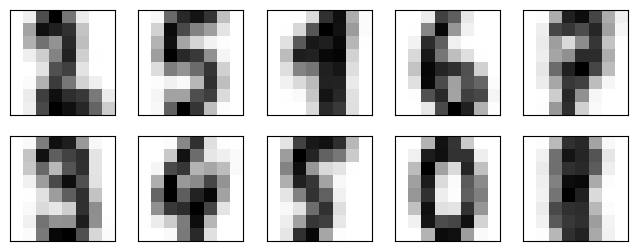

In [70]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

There is a lot more about using k-means in [this notebook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb), including a great example of dimensionality reduction for color images and a brick-and-mortar implementation of k-means algorithm. I strongly recommend reading it all!